<a href="https://colab.research.google.com/github/chetansathishkumar/mnist-classification/blob/main/Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

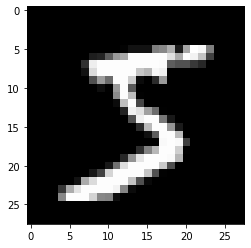

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

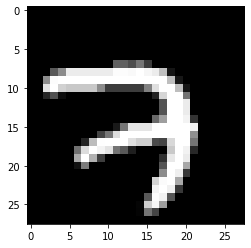

In [18]:
single_image = X_train[5000]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[5000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [22]:
model.compile(loss="categorical_crossentropy", metrics='accuracy',optimizer="adam")

In [41]:
model.fit(X_train_scaled ,y_train_onehot, epochs=2,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/2
938/938 [==============================] - 58s 62ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0340 - val_accuracy: 0.9895
Epoch 2/2
938/938 [==============================] - 57s 61ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9879


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [43]:
metrics = pd.DataFrame(model.history.history)

In [44]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.033813,0.989633,0.033992,0.9895
1,0.028931,0.990867,0.038140,0.9879


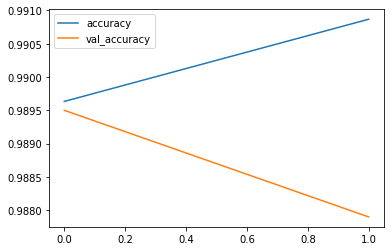

In [45]:
metrics[['accuracy','val_accuracy']].plot()

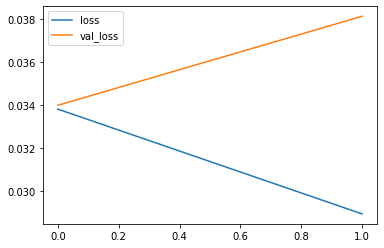

In [46]:
metrics[['loss','val_loss']].plot()

In [47]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [48]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    0    0    0    1    0    1    0    0]
 [   4    1 1011    0    0    0    0   12    4    0]
 [   0    0    0 1004    0    3    0    2    1    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0    2    0  887    0    1    0    1]
 [  14    4    0    0    3   13  923    0    1    0]
 [   1    2    1    0    1    0    0 1021    1    1]
 [   3    0    1    1    0    3    0    4  959    3]
 [   1    1    0    3    8    4    0    7    0  985]]


In [49]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.96      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [50]:
img = image.load_img('four1.jpg')

In [51]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [52]:
img = image.load_img('four1.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [53]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [54]:
print(x_single_prediction)

[2]


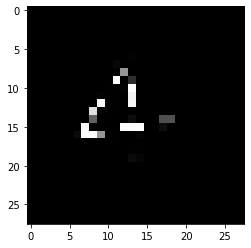

In [55]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [56]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [57]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [58]:
print(x_single_prediction)

[4]
